In [98]:
import sys
sys.path.append("/data1/andrew/meng/mixehr/meng/VAE-EHR/src")

from importlib import reload
import os

from typing import List, Tuple
from tsnecuda import TSNE
from umap import UMAP

import numpy as np 
import pandas as pd

import torch
from torch import nn, optim

import matplotlib.pyplot as plt
from matplotlib import colors

import vae

from vae import VAE
from vae import VAETrainer

from icd_analysis_helper import ICDAnalysisHelper

from scipy.spatial.distance import pdist, squareform

In [5]:
mimic_root_path = "/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4"
icd9codes_path = os.path.join(mimic_root_path, "D_ICD_DIAGNOSES.csv.gz")
icd9codes = pd.read_csv(icd9codes_path)

patient_icd_file = "/data1/andrew/meng/mixehr/data/Mimic/andrew_outputs/PATIENT_ICD_BINARY.csv"
patient_icd_df = pd.read_csv(patient_icd_file, sep=' ')

patient_icd_data = patient_icd_df.drop('SUBJECT_ID', axis=1)
data = torch.tensor(patient_icd_data.values).float()
print(data.shape)

torch.Size([46520, 6984])


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print((device))

print("Feature_dim: {}".format(data.shape[1]))
model = VAE(
    feature_dim = data.shape[1], 
    encoder_dim = [(250, 500), (500, 250), (250, 100)],
    latent_dim = 10,
    decoder_dim = []
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
print(type(optimizer))

cuda
Feature_dim: 6984
<class 'torch.optim.adam.Adam'>


In [7]:
date="200110"
experiment_name = "{}_patient_clusters_linear_encoder_single_layer_decoder".format(date)
epoch = 20
tag = ""
model.load_state_dict(torch.load("./VAE_exp_{}_epoch_{}.pkl".format(experiment_name, epoch)))

<All keys matched successfully>

In [19]:
output_weights = model.state_dict()["output_decoder.weight"]
output_biases = model.state_dict()["output_decoder.bias"]

print(output_weights.shape)
print(output_biases.shape)

torch.Size([6984, 10])
torch.Size([6984])


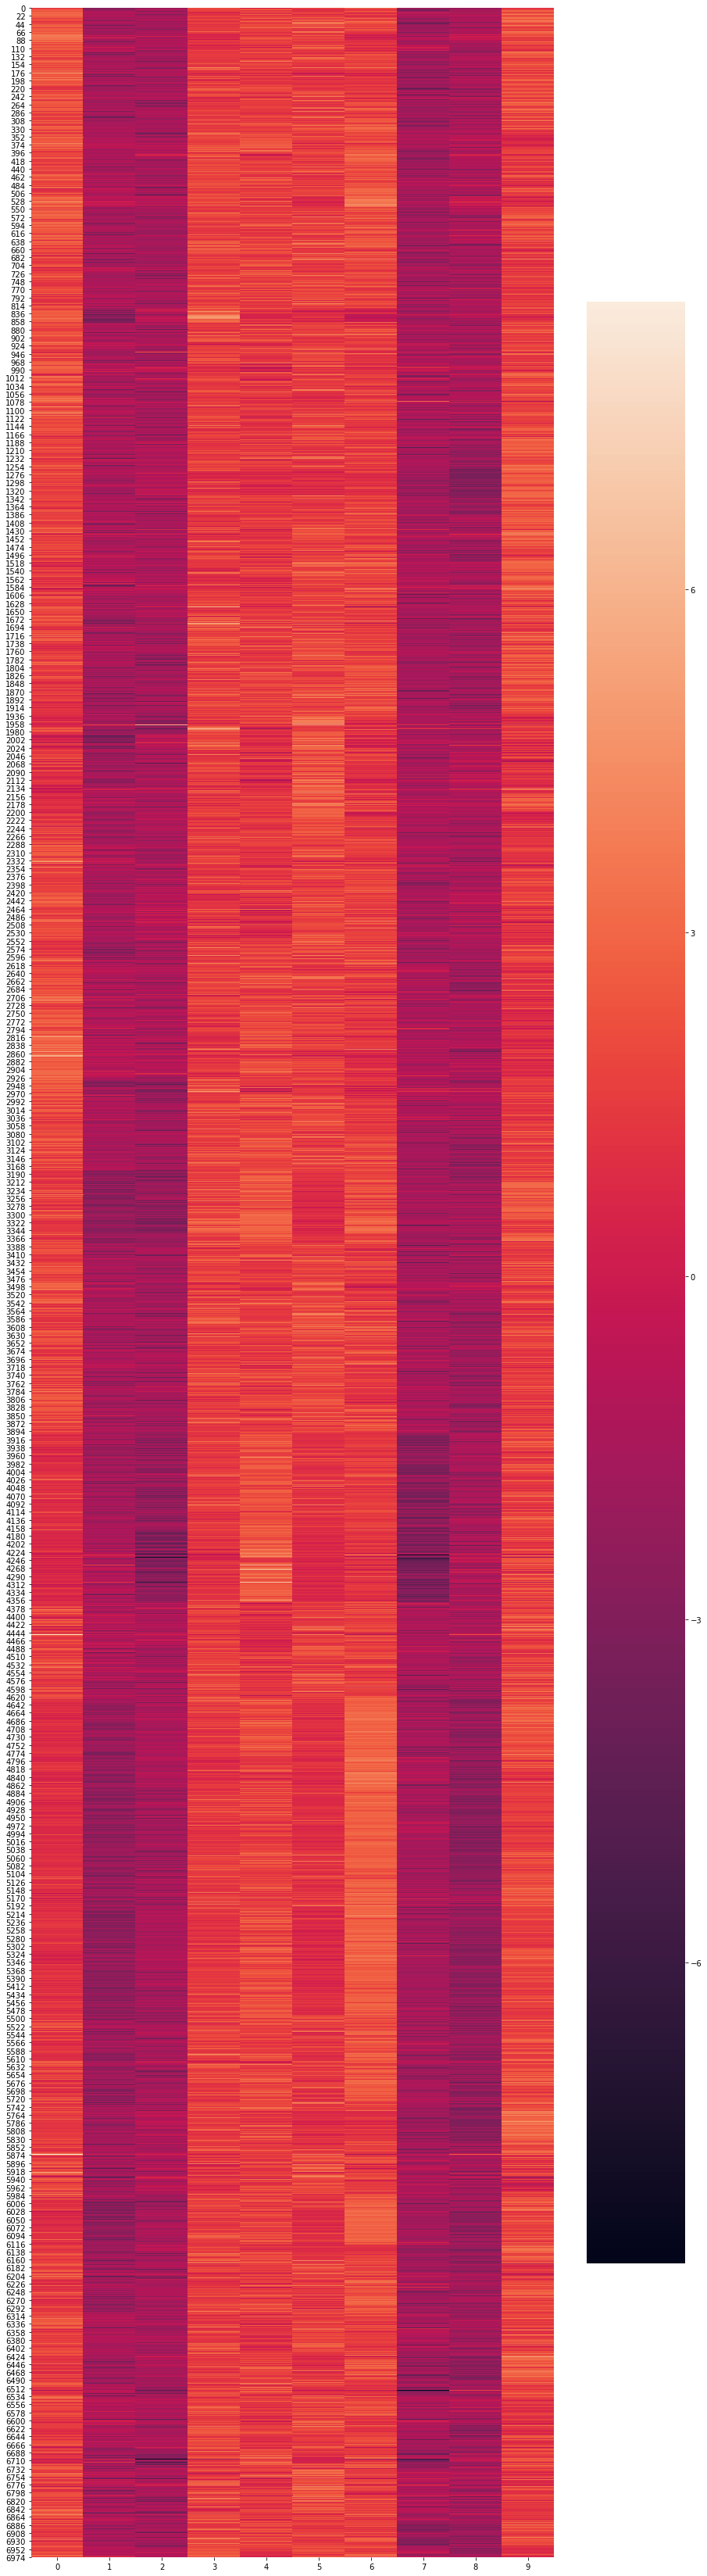

In [91]:
import seaborn as sns

plt.figure(figsize=(15,60))
sns.heatmap(output_weights)

In [99]:
weight_similarity_matrix_euc = squareform(pdist(output_weights, metric='euclidean'))
weight_similarity_matrix_cos = squareform(pdist(output_weights, metric='cosine'))

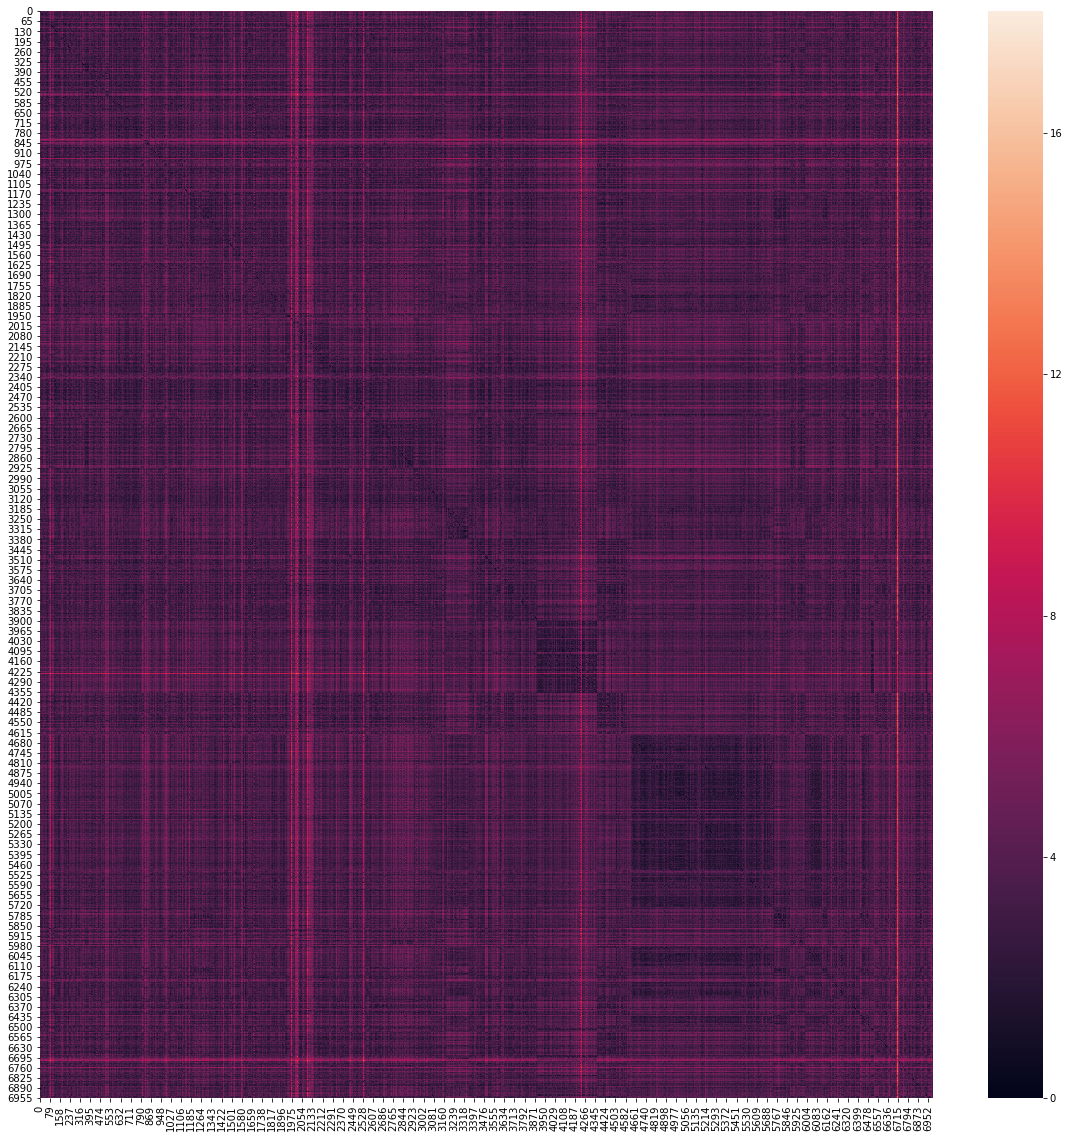

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(weight_similarity_matrix_euc)
plt.savefig("heatmap_exp_{}_epoch_{}_{}".format(experiment_name, epoch, "euclidean"))

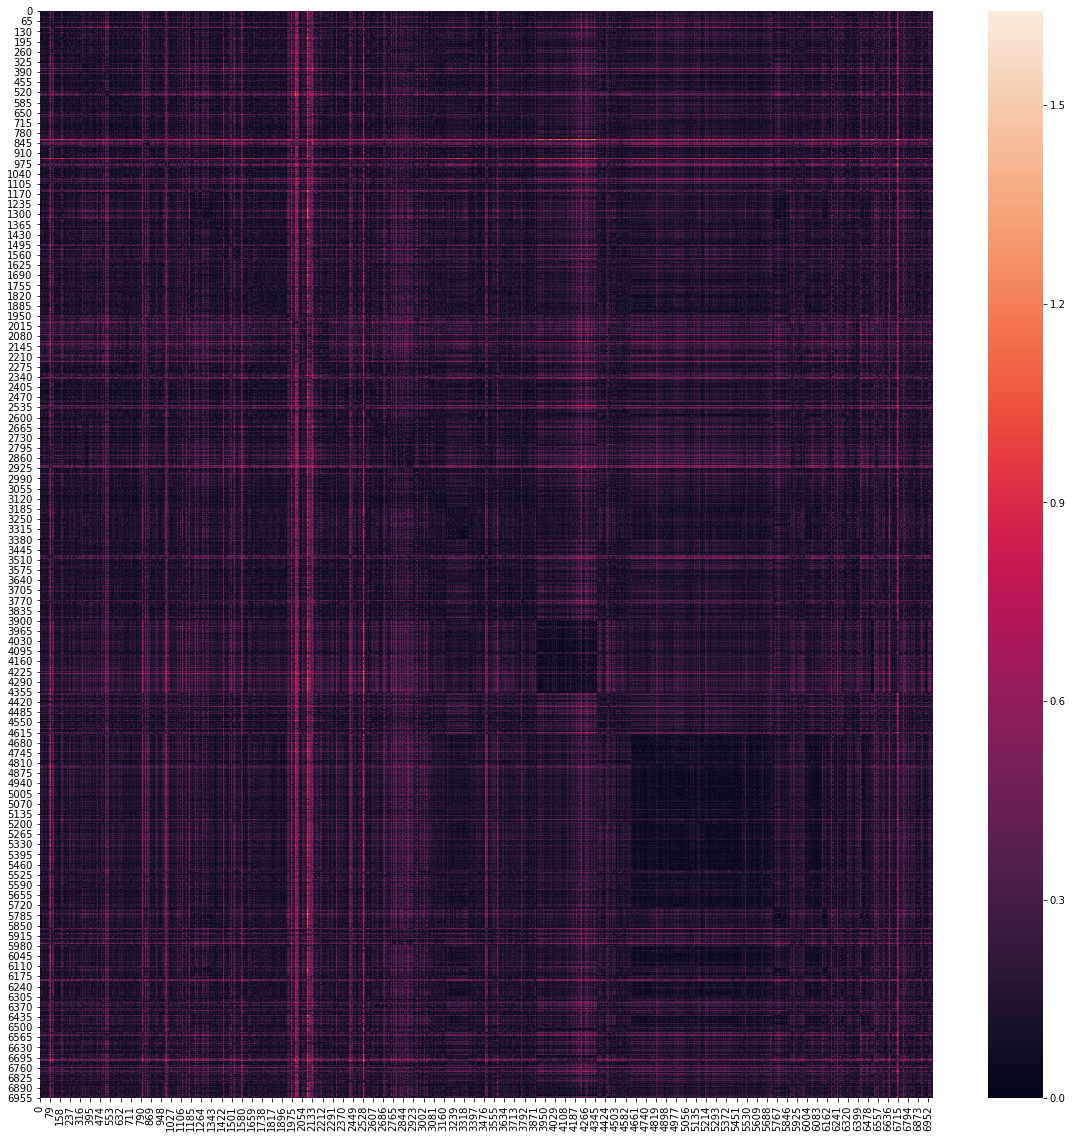

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(weight_similarity_matrix_cos)
plt.savefig("heatmap_exp_{}_epoch_{}_{}".format(experiment_name, epoch, "cosine"))